In [1]:
import numpy as np
import PIL.Image
from tqdm.auto import tqdm
from collections import namedtuple

In [26]:
# load all images in leftImg8bit folder
import os
import json

folders = os.listdir('./Data/RAWCS/cityscapes/leftImg8bit/val')
images = []
for folder in folders:
    listed = os.listdir('./Data/RAWCS/cityscapes/leftImg8bit/val/' + folder)
    for image in listed:
        images.append(folder + '/' + image)

images_array = []
color_segmentation = []
instance_ids = []
label_ids = []
jsons = []
for image in tqdm(images):
    images_array.append(np.array(PIL.Image.open('./Data/RAWCS/cityscapes/leftImg8bit/val/' + image)))
    color_segmentation.append(np.array(PIL.Image.open('./Data/RAWCS/cityscapes/gtFine/val/' + image.replace('leftImg8bit', 'gtFine_color'))))
    instance_ids.append(np.array(PIL.Image.open('./Data/RAWCS/cityscapes/gtFine/val/' + image.replace('leftImg8bit', 'gtFine_instanceIds'))))
    label_ids.append(np.array(PIL.Image.open('./Data/RAWCS/cityscapes/gtFine/val/' + image.replace('leftImg8bit', 'gtFine_labelIds'))))
    with open('./Data/RAWCS/cityscapes/gtFine/val/' + image.replace('leftImg8bit', 'gtFine_polygons').replace('png', 'json')) as f:
        jsons.append(json.load(f))

  0%|          | 0/500 [00:00<?, ?it/s]

In [27]:
len(images_array), len(color_segmentation), len(instance_ids), len(label_ids), len(jsons)

(500, 500, 500, 500, 500)

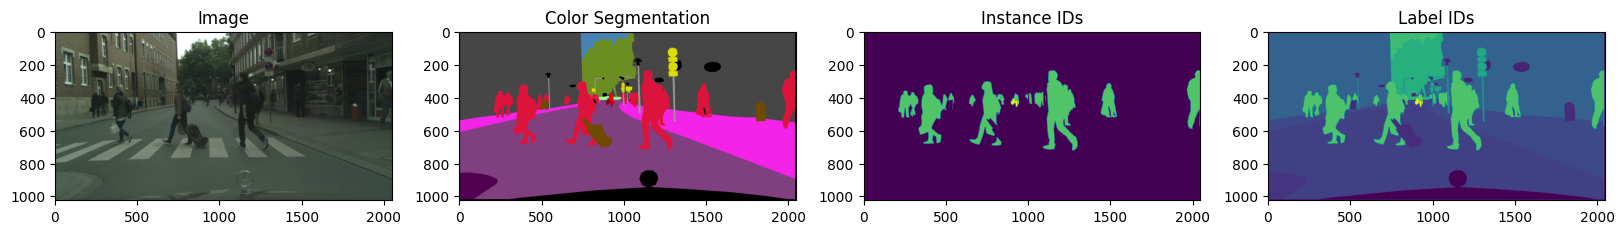

array([ 1,  3,  4,  5,  6,  7,  8, 11, 17, 20, 21, 22, 23, 24, 25, 33],
      dtype=uint8)

In [28]:
import matplotlib.pyplot as plt

rnd_idx = np.random.randint(0, len(images_array))

fig, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(images_array[rnd_idx])
ax[0].set_title('Image')
ax[1].imshow(color_segmentation[rnd_idx])
ax[1].set_title('Color Segmentation')
ax[2].imshow(instance_ids[rnd_idx])
ax[2].set_title('Instance IDs')
ax[3].imshow(label_ids[rnd_idx])
ax[3].set_title('Label IDs')
plt.show()

np.unique(label_ids[rnd_idx])

In [30]:
label_ids = np.array(label_ids)
label_ids.shape

(500, 1024, 2048)

In [44]:
instance_ids = np.array(instance_ids)

instance_ids.shape

(500, 1024, 2048)

In [46]:
label_ids.dtype

dtype('uint8')

In [31]:
label_ids.dtype

dtype('uint8')

In [ ]:
images = np.array(images_array)
np.save('./')

In [33]:
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

In [62]:
evaluted_labels = [label.name for label in labels if not label.ignoreInEval]
evaluated_label_ids = [label.id for label in labels if not label.ignoreInEval]
realized_label_ids = list(range(1,len(evaluated_label_ids)+1))
label_has_instance = [label.hasInstances for label in labels if not label.ignoreInEval]

In [63]:
label_has_instance

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [47]:
# re align the label ids and remove unevaluated labels from label_ids
label_ids_ = np.zeros_like(label_ids)
instance_ids_ = np.zeros_like(instance_ids)

for i in range(len(evaluated_label_ids)):
    label_ids_[label_ids == evaluated_label_ids[i]] = realized_label_ids[i]
    mask = instance_ids//1000 == evaluated_label_ids[i]
    instance_ids_[mask] = realized_label_ids[i]*1000 + instance_ids[mask]%1000

In [61]:
np.unique(instance_ids_//1000)

array([ 0, 12, 13, 14, 15, 16, 17, 18, 19], dtype=uint16)

In [57]:
np.save('./Data/cityscapes/label_ids.npy', label_ids_)
np.save('./Data/cityscapes/instance_ids.npy', instance_ids_)

In [64]:
# create a dictionary for the labels
label_dict = {}

for i in range(len(evaluted_labels)):
    label_dict[evaluted_labels[i]] = {"id": realized_label_ids[i], "has_instance": label_has_instance[i]}
    
with open('./Data/cityscapes/label_dict.json', 'w') as f:
    json.dump(label_dict, f)

In [59]:
instance_ids_.shape

(500, 1024, 2048)

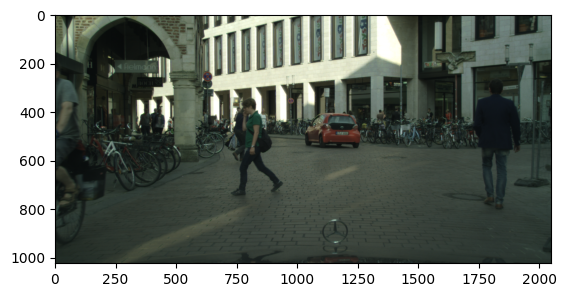

In [56]:
idx = instance_ids_.argmax()
# convert idx to x, y, z
x = idx % instance_ids_.shape[2]
y = (idx // instance_ids_.shape[2]) % instance_ids_.shape[1]
z = idx // (instance_ids_.shape[2] * instance_ids_.shape[1])

plt.imshow(images_array[z])

In [ ]:
images[z].d

'munster/munster_000141_000019_leftImg8bit.png'

In [50]:
evaluted_labels

['road',
 'sidewalk',
 'building',
 'wall',
 'fence',
 'pole',
 'traffic light',
 'traffic sign',
 'vegetation',
 'terrain',
 'sky',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'train',
 'motorcycle',
 'bicycle']